<a href="https://colab.research.google.com/github/Sushantkm/Deep-Learning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [214]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

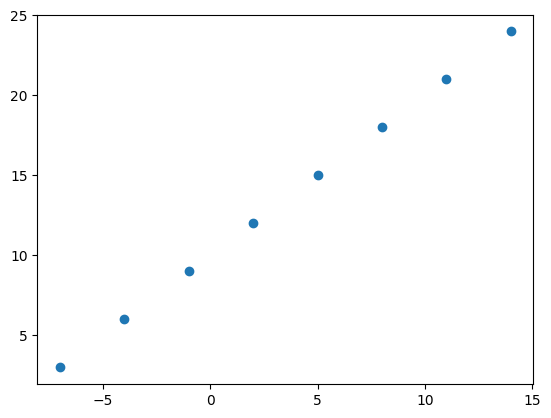

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizie it
plt.scatter(X,y)

In [216]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#  Input and Output shapes

In [217]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [218]:
X[0], y[0]

(-7.0, 3.0)

In [219]:
X[1], y[1]

(-4.0, 6.0)

In [220]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [221]:
X[0].ndim

0

In [222]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [223]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

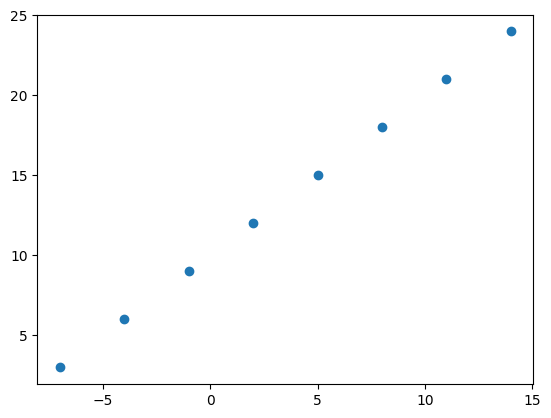

In [224]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of deep a learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [225]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) # short for stochastic gradient descent
# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 333ms/step - loss: 10.3483 - mae: 10.3483
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 10.2158 - mae: 10.2158
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 10.0833 - mae: 10.0833
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.9508 - mae: 9.9508
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.8183 - mae: 9.8183


In [226]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [227]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 67ms/step


array([[18.333084]], dtype=float32)

# Improving our model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

**Note:** Learning rate is the most important hyper parameter.

In [228]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100, verbose=0)

In [229]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [230]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[29.725878]], dtype=float32)

In [231]:
# # Let's rebuild our model
# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation="relu", input_shape=(1,)),
#     tf.keras.layers.Dense(1, input_shape=(1,))
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#               metrics=['mae'])

# # 3. Fit the model
# model.fit(X, y, epochs=100)

In [232]:
# y_pred = model.predict([17.0])
# y_pred

In [233]:
# # Let's rebuild our model
# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, input_shape=(1,)),
#     tf.keras.layers.Dense(1, input_shape=(1,))
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
#               metrics=['mae'])

# # 3. Fit the model
# model.fit(X, y, epochs=100)

In [234]:
# y_pred = model.predict([17.0])
# y_pred

In [235]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(50, input_shape=(1,), activation="relu"),
#     tf.keras.layers.Dense(1)
# ])

# model.compile(loss="mae",
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#               metrics=["mae"])

# model.fit(X, y, epochs=100)

In [236]:
model.predict([17.0])

1/1 [==============================] - 0s 39ms/step


array([[29.725878]], dtype=float32)

# Evaluating a model

In practice, a typical workflow you'll go through when building a neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation... there are 3 words youshould memorize:

>"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The mode itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels).

In [237]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [238]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

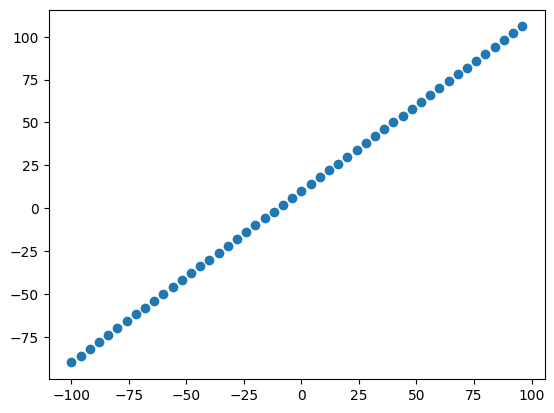

In [239]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [240]:
# Check the lrngth of how many samples we have
len(X)

50

In [241]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are the training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualising the data

Now we've got our data in the training and test sets... let's visualize it again!

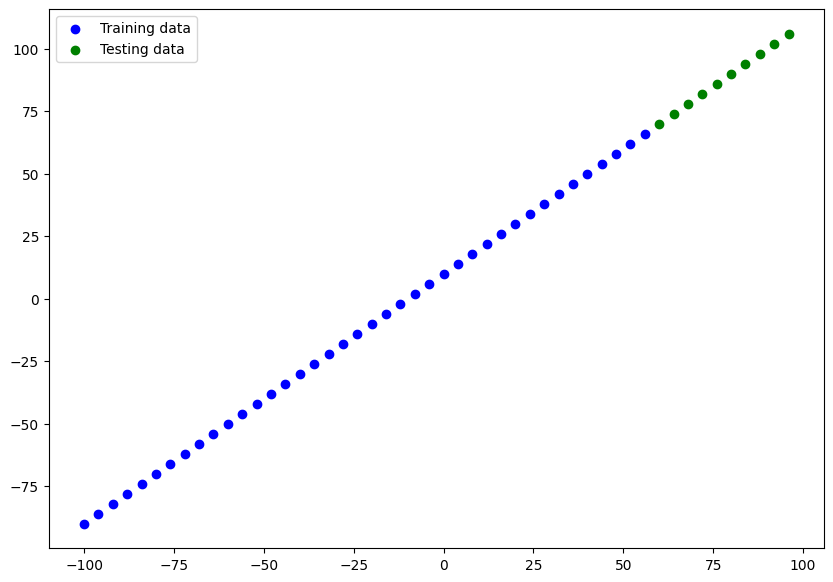

In [242]:
plt.figure(figsize=(10,7))
#  Plot the training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data") #want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [243]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting the model
model.fit(X_train, y_train, epochs=100, verbose=0)


In [245]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [246]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


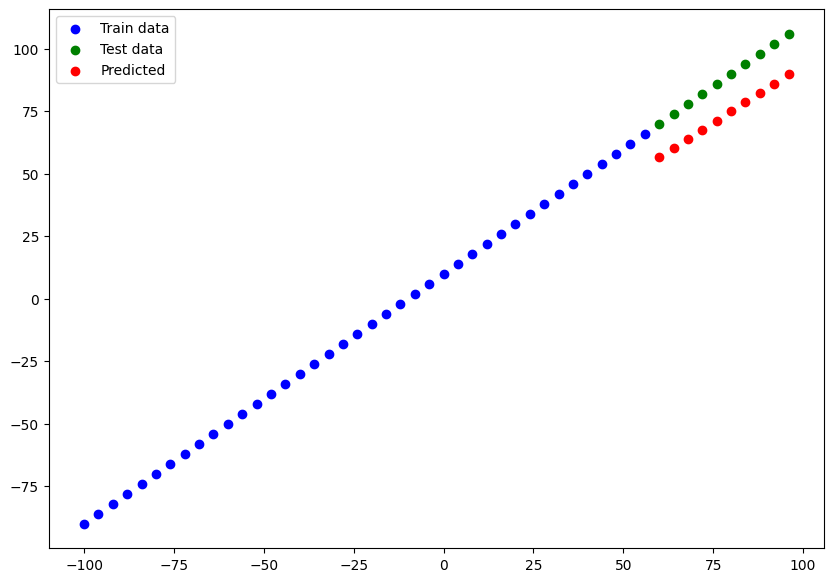

In [247]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Train data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.scatter(X_test, y_pred, c='r', label='Predicted')
plt.legend();

In [248]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [249]:
# Let's make a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), name="input_layer",activation="relu"),
    tf.keras.layers.Dense(5, activation="relu", name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# 2. compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])



In [250]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer (Dense)        (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Total Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters fom othe models during **transfer learning**).

📖 **Resource:** For a more in-depth overiew of the trainable parameters within a layer, check our [MIT's introduction to Deep Learning](https://www.youtube.com/watch?v=QDX-1M5Nj7s).

⚒ **Exercise:** Try playing around the number of hidden units in dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [251]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [252]:
model.predict(X_test)

1/1 [==============================] - 0s 58ms/step


array([[ 69.84797 ],
       [ 73.978294],
       [ 78.10863 ],
       [ 82.238945],
       [ 86.369286],
       [ 90.49961 ],
       [ 94.62994 ],
       [ 98.76027 ],
       [102.8906  ],
       [107.02093 ]], dtype=float32)

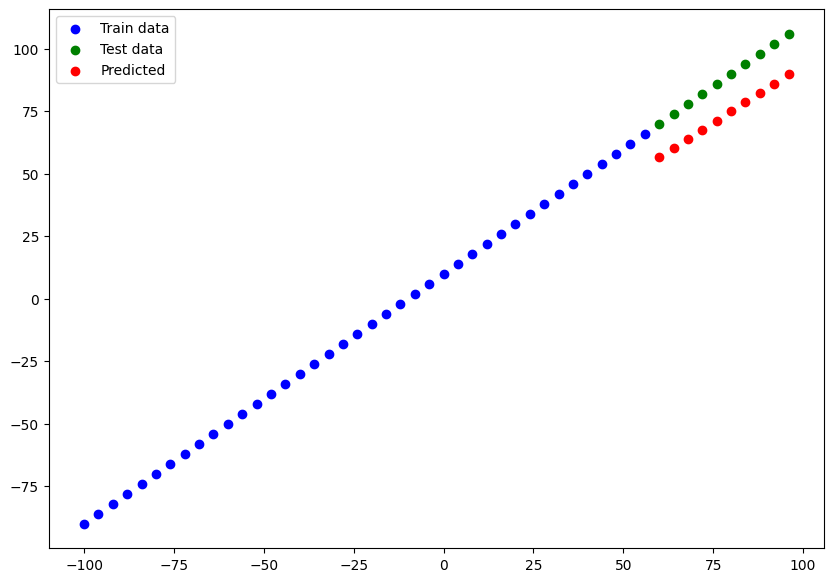

In [253]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Train data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.scatter(X_test, y_pred, c='r', label='Predicted')
plt.legend();

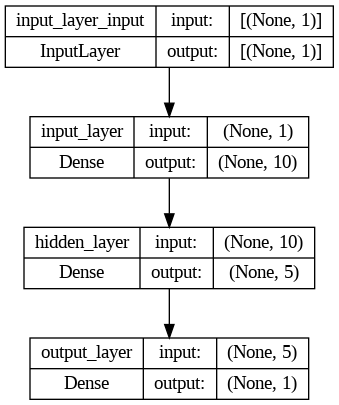

In [254]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions